# Polynomial Regression with Regularization

In this notebook, we demonstrate polynomial regression using scikit-learn, along with two forms of regularization: L1 (Lasso) and L2 (Ridge). We'll evaluate each model using common regression metrics and visualize the results to highlight the effect of regularization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
DATASET_COUNT = 100
NOISE = 3
DEGREE = 3

create a synthetic nonlinear dataset with 100 points in the range −3,3−3,3, based on a cubic function plus Gaussian noise.

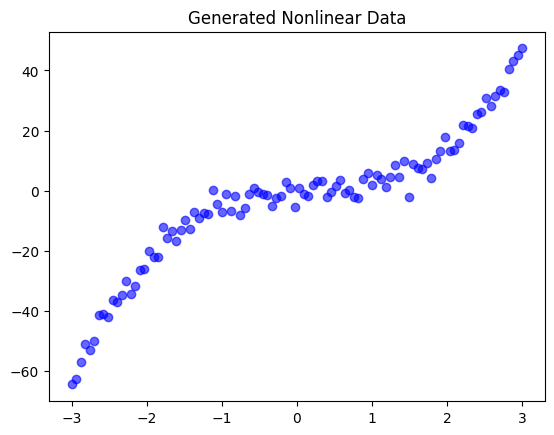

In [3]:
np.random.seed(42)
X = np.linspace(-3, 3, DATASET_COUNT).reshape(-1, 1)
y = 2 * X[:, 0]**3 - X[:, 0]**2 + X[:, 0] + np.random.randn(DATASET_COUNT) * NOISE
plt.scatter(X, y, color="blue", alpha=0.6)
plt.title("Generated Nonlinear Data")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a polynomial regression model of degree 3 using LinearRegression. The pipeline automatically expands features into polynomial terms.

In [5]:
poly_model = make_pipeline(PolynomialFeatures(degree=DEGREE), LinearRegression())
poly_model.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


Mean Squared Error (MSE): Penalizes large errors.

Mean Absolute Error (MAE): Averages absolute differences.

R² Score: Measures proportion of variance explained.

In [6]:
def print_metrics(y_true, y_pred):
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))

In [7]:
y_pred_poly = poly_model.predict(X_test)
print("Polynomial Regression Metrics:")
print_metrics(y_test, y_pred_poly)

Polynomial Regression Metrics:
MSE: 5.420224457064383
MAE: 1.7493108865196496
R2: 0.9891093928412679


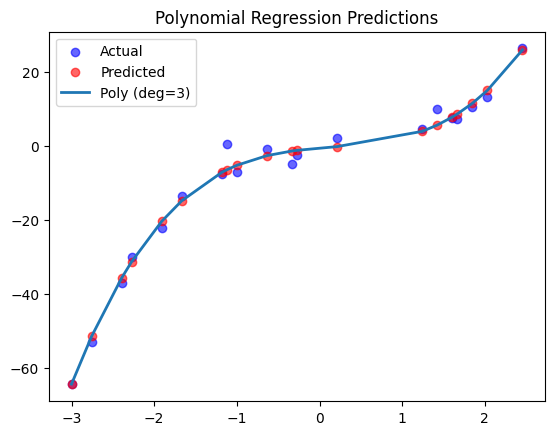

In [8]:
# Sort X_test and get the sorted indices
sorted_indices = np.argsort(X_test.ravel())  # ravel to make sure it's 1D

# Apply the sorting to both X_test and y_pred_poly
X_test_sorted = X_test[sorted_indices]
y_pred_poly_sorted = y_pred_poly[sorted_indices]

# Now plot
plt.scatter(X_test, y_test, label="Actual", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred_poly, label="Predicted", color="red", alpha=0.6)
plt.plot(X_test_sorted, y_pred_poly_sorted, label="Poly (deg=3)", linewidth=2)
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()

Apply Ridge regression with polynomial features. L2 regularization discourages large coefficients to reduce overfitting.

In [9]:
ridge_model = make_pipeline(PolynomialFeatures(degree=DEGREE), Ridge(alpha=10))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Metrics:")
print_metrics(y_test, y_pred_ridge)

Ridge Regression Metrics:
MSE: 5.417667099805793
MAE: 1.7543660252066506
R2: 0.9891145312213273


Apply Lasso regression with polynomial features. L1 regularization tends to shrink some coefficients to zero, which can also perform feature selection.

In [10]:
lasso_model = make_pipeline(PolynomialFeatures(degree=DEGREE), Lasso(alpha=0.1, max_iter=10000))
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression Metrics:")
print_metrics(y_test, y_pred_lasso)

Lasso Regression Metrics:
MSE: 5.4124116461760625
MAE: 1.73806739473716
R2: 0.9891250907620578


Plot and compare the predictions of all three models (Plain Polynomial, Ridge, and Lasso) on the same graph. Observe the differences in their learned curves.

set:

    DATASET_COUNT = 50
    NOISE = 10
    DEGREE = 15
    
to force-overfit the model

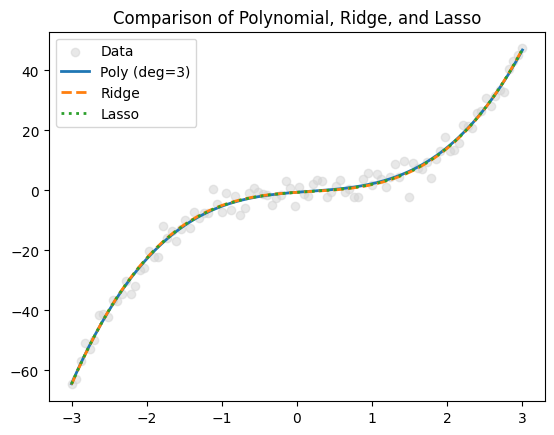

In [11]:
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

plt.scatter(X, y, color="lightgray", label="Data", alpha=0.5)
plt.plot(X_line, poly_model.predict(X_line), label="Poly (deg=3)", linewidth=2)
plt.plot(X_line, ridge_model.predict(X_line), label="Ridge", linestyle="--", linewidth=2)
plt.plot(X_line, lasso_model.predict(X_line), label="Lasso", linestyle=":", linewidth=2)
plt.legend()
plt.title("Comparison of Polynomial, Ridge, and Lasso")
plt.show()